# Ведение в генетические алгоритмы


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [1]:
import random as random # генератор случаных значений
import numpy as np # работа с массивами
import matplotlib.pyplot as plt # работа с графиками
import matplotlib.colors as colors
%matplotlib inline 

# Поиск минимума функции

In [2]:
# функция создания популяции
def getParents(popul, nsurv):
    indexp1 = random.randint(0,nsurv-1)
    indexp2 = random.randint(0,nsurv-1)
    botp1 = newpopul[indexp1]
    botp2 = newpopul[indexp2]
    
    return botp1, botp2

# функция выживших
def getSurvPopul(popul, val, nsurv, reverse): 
    newpopul = []
    sval = sorted(val, reverse=reverse)
    for i in range(nsurv):
      index = val.index(sval[i])
      newpopul.append(popul[index])
    return newpopul, sval

# скрещивания 
def crossPointFrom2Parents(botp1, botp2, j):
    pindex = random.random()
    if pindex < 0.5:
      x = botp1[j]
    else:
      x = botp2[j]
    return x

In [3]:
n = 100 # размер популяции
nsurv = 50 # кол-во выживших
nnew = n-nsurv # сколько будет создано новых ботов
l = 8 # длина бота
epohs = 500 # количество эпох
mut = 0.5 # коэффициент мутации

popul = [] # популяция (n ботов блиной l)
val = [] # значения ботов

for i in range(n): # генерим ботов
  popul.append([]) # 
  for j in range(l): # 
    popul[i].append(random.random()) # добавляем в популяцию

for it in range(epohs): # 
  val = [] # 
  
  for i in range(n): # идём  по всей популяции
    bot = popul[i] # выцепляем текущего бота
    x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # перебираем x
    y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # перебираем y
    f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y # функция у которой ищем минимум
    #f = x*x-y+5
    #f = x*x/(y+5)-y*y/x+5
    val.append(abs(f)) # модуль f
    
  newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # создаем новую популяцию
  print(it, " ", [round(s,8) for s in sval[0:5]]) # выводим 5 самых лучших значений
 
  for i in range(nnew): # проходимся по новым ботам
    
    botp1, botp2 = getParents(newpopul, nsurv) 
    newbot = [] # новый пустой бот
    
    for j in range(l): # 
      x = crossPointFrom2Parents(botp1, botp2, j) # скрещивание 
      x += mut*(random.random() - 0.5) # мутация (коэфициент)
        
      newbot.append(x)
      
    newpopul.append(newbot) # 
    
  popul = newpopul # заменяем старую пополяцию на новую

0   [9.70954115, 10.42971287, 10.76558865, 10.98393769, 11.61582994]
1   [8.01002075, 8.35107551, 8.38247405, 8.65365512, 8.68460747]
2   [0.79488466, 5.0272722, 8.01002075, 8.35107551, 8.38247405]
3   [0.79488466, 5.0272722, 5.57636368, 7.84099788, 8.01002075]
4   [0.79488466, 5.0272722, 5.57636368, 7.84099788, 8.01002075]
5   [0.79488466, 5.0272722, 5.57636368, 7.84099788, 8.01002075]
6   [0.79488466, 5.0272722, 5.57636368, 7.74177783, 7.84099788]
7   [0.79488466, 1.15557806, 4.20175555, 5.0272722, 5.57636368]
8   [0.79488466, 1.15557806, 4.20175555, 5.0272722, 5.57636368]
9   [0.79488466, 1.13804662, 1.15557806, 4.20175555, 5.0272722]
10   [0.79488466, 1.13804662, 1.15557806, 4.20175555, 5.0272722]
11   [0.79488466, 1.00013761, 1.13804662, 1.15557806, 1.71069071]
12   [0.79488466, 1.00013761, 1.13804662, 1.15557806, 1.38126207]
13   [0.79488466, 1.00013761, 1.13804662, 1.15557806, 1.38126207]
14   [0.79488466, 1.00013761, 1.13804662, 1.15557806, 1.38126207]
15   [0.21118935, 0.79488

In [4]:
# посмотрим самого лучшего бота и значения x и y
bot = popul[0] # 
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # 
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # 
f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y # 
print(bot)
print("x =",x, "y =", y)
print(f)

[0.3258968653168014, -0.24540511879352894, 0.1068475429409802, -0.28473119823813053, 0.5037604063969635, 0.49258893319966, 0.3821225495733431, 0.38446102193145465]
x = -6.950933255194305 y = 16.39945611641506
0.0001548125045054416


In [5]:
# x и y лучших 20 ботов
for i in range(20): # 
  bot = popul[i] # 
  x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # 
  y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # 
  f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y # 
  print("x =",x, "y =", y, "f =", f)

x = -6.950933255194305 y = 16.39945611641506 f = 0.0001548125045054416
x = -3.1318525485923487 y = 12.391025711420774 f = -0.0008525375080792319
x = -8.315688537933603 y = 14.919686735947339 f = 0.002464858077324994
x = -8.13658692240523 y = 15.189621287248649 f = -0.002675390713946957
x = -7.444894235843823 y = 16.02513987283293 f = -0.0030306287253190067
x = -8.528539531073374 y = 14.592167617584728 f = -0.004291547107373006
x = -7.87544375620743 y = 15.544338001181263 f = -0.00446402512523103
x = -3.881722087581995 y = 14.063180982041608 f = -0.005041064738180223
x = -8.89059239775335 y = 13.9834639409758 f = -0.0050673024418508295
x = -6.340270497235943 y = 16.573219093153394 f = 0.005607928013080743
x = -5.551045742696902 y = 16.326481570838904 f = -0.00610458983896911
x = -9.845089215320902 y = 12.257457107593169 f = 0.0061084865560459
x = -10.031227628774484 y = 11.924206781969755 f = 0.006924808090033263
x = -4.411850763815077 y = 15.00429406902684 f = 0.0072759207068560094
x =

# Распределение грузов по поездам

0   68.18   [36, 36, 38, 42, 42, 42, 44, 46, 46, 48, 48, 50, 50, 52, 52, 52, 52, 52, 52, 54]
1   51.74   [24, 26, 26, 30, 30, 34, 34, 34, 34, 36, 36, 36, 36, 36, 36, 36, 38, 38, 38, 38]
2   41.84   [20, 22, 24, 24, 24, 24, 26, 26, 26, 28, 28, 28, 30, 30, 30, 30, 30, 30, 32, 32]
3   39.64   [20, 20, 20, 22, 22, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26, 26, 26, 26, 28]
4   36.84   [20, 20, 20, 20, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
5   32.32   [16, 16, 16, 18, 20, 20, 20, 20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22]
6   35.12   [16, 16, 16, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 22]
7   33.46   [16, 16, 16, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
8   32.44   [16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20]
9   33.18   [16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20]
10   31.86   [16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 

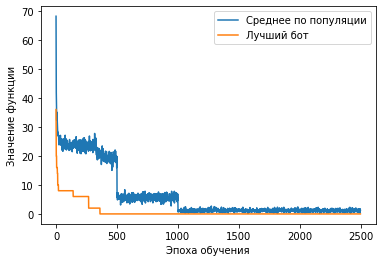

In [6]:
n = 100 # 
nsurv = 20 # 
nnew = n-nsurv #
epohs = 2500 # 
mut = 0.2 #

train = np.array([11, 18, 6, 15, 9, 3, 2, 21]) # 8 поездов разной вместительности
size = np.array([6, 5, 7, 9, 1, 8, 8, 4, 9, 4, 2, 3, 7, 7, 5]) # наши грузы
l = size.shape[0] # длина бота
trains = train.shape[0] # кол-во поездов

popul = [] #
val = [] #

plotmeanval = [] # среднее на всей популяции
plotminval = [] # минимальное значение

for i in range(n): #
  popul.append([]) #
  for j in range(l): #
    popul[i].append(random.randint(0,trains-1)) #

for it in range(epohs):#
  if (it == 500): # 
    mut = 0.05 # 
  if (it == 1000): # 
    mut = 0.01 # 
  val = [] # 
  
  for i in range(n): # 
    bot = popul[i] # 
    trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0]) # на сколько заполняет каждый поезд
    for j in range(l):
      trainfill[bot[j]] += size[j]
      f = 0
      for j in range(trains):
        f += abs(train[j]-trainfill[j]) # вместительност поезда и сколько закинул бот
    val.append(f)
    
  newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
  print(it, " ", sum(val)/len(val), " ", sval[0:20])
  
  plotmeanval.append(sum(val)/len(val))
  plotminval.append(sval[0])
  
  for i in range(nnew): # генерим новую популяцию
    botp1, botp2 = getParents(newpopul, nsurv)
    newbot = []
    for j in range(l):
      x = crossPointFrom2Parents(botp1, botp2, j)    
      if (random.random() < mut):
        x = random.randint(0,trains-1) 
      newbot.append(x)
    newpopul.append(newbot)    
  popul = newpopul
  
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [7]:
for i in range(20):
  print(popul[i])

[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]
[2, 1, 3, 7, 1, 1, 3, 1, 4, 0, 6, 5, 0, 7, 7]


In [8]:
# как заполняется поезд
bot = popul[0]
trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])
for j in range(l):
  trainfill[bot[j]] += size[j]

print(trainfill)
print(train)

[11 18  6 15  9  3  2 21]
[11 18  6 15  9  3  2 21]
